# Convolutional Neural Network


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline

### What is a convolutional neural network?

A convolutional neural network differs from a perceptron in that it has additional layers dedicated to compressing the input into more easily processable forms, while still keeping features critical for prediction. This is accomplished with the use of a kernel matrix. The kernel matrix is some matrix with a size and entries determined by the user to be multiplied by certain regions of the input matrix, and whose output is then entered into the output matrix. 

For example, if our input matrix was a 5 x 5 x 1 matrix:

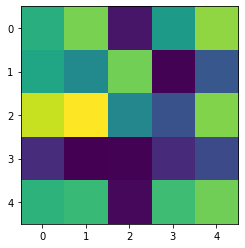

In [2]:
Input = np.array([np.random.uniform(0,1,5),
                  np.random.uniform(0,1,5),
                  np.random.uniform(0,1,5),
                  np.random.uniform(0,1,5),
                  np.random.uniform(0,1,5)])
plt.imshow(Input)

We can choose a kernal matrix of size 3 x 3 to multiply by each 3 x 3 region of our input matrix, and place the resulting values into a new matrix.

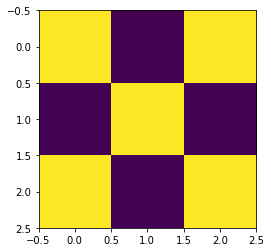

In [3]:
kernel = np.array([[1,0,1],
                  [0,1,0],
                  [1,0,1]])
plt.imshow(kernel)

Let's consider the entries in the first 3 rows and columns of our Input matrix:

In [4]:
product = np.matmul(Input[:3,:3],kernel)

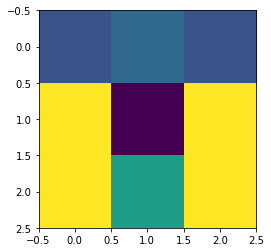

In [5]:
plt.imshow(product)

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

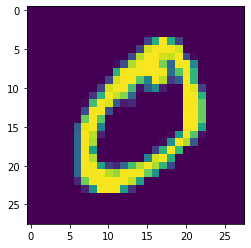

In [7]:
image = x_train[1]
plt.imshow(image)
plt.show()

In [8]:
image.shape

(28, 28)

In [9]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


The two layers we'll be using are the Conv2D layer and the MaxPooling2D layer. TheConv2D layer returns a tensor with the specified dimensionality after being processed by a kernel of the specified size. The output is also determined by the activation function used for the kernel. In this case, we'll be using the 'relu' activation, which is the rectified linear unit activation function. This activation function takes in the input region and outputs the maximum between the max value in the input region and 0. 

The MaxPooling2D layer simply finds the maximum value in the designated pool size and stores this value in a new tensor. The size of the output tensor is dependent on both the pool size and the 'strides' size. The strides argument determines how the pool is shifted over each dimension.

In [10]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),   # Tell the model what the shape of our data is
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),    # Our first CNN layer has a kernel size of (3,3)
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

2021-11-26 22:19:59.713062: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 12s 29ms/step - loss: 0.3549 - accuracy: 0.8947 - val_loss: 0.0840 - val_accuracy: 0.9768
Epoch 2/15
422/422 [==============================] - 12s 29ms/step - loss: 0.1093 - accuracy: 0.9665 - val_loss: 0.0550 - val_accuracy: 0.9857
Epoch 3/15
422/422 [==============================] - 12s 29ms/step - loss: 0.0810 - accuracy: 0.9750 - val_loss: 0.0438 - val_accuracy: 0.9892
Epoch 4/15
422/422 [==============================] - 12s 29ms/step - loss: 0.0684 - accuracy: 0.9787 - val_loss: 0.0401 - val_accuracy: 0.9888
Epoch 5/15
422/422 [==============================] - 12s 29ms/step - loss: 0.0603 - accuracy: 0.9815 - val_loss: 0.0369 - val_accuracy: 0.9897
Epoch 6/15
422/422 [==============================] - 12s 30ms/step - loss: 0.0537 - accuracy: 0.9831 - val_loss: 0.0335 - val_accuracy: 0.9907
Epoch 7/15
422/422 [==============================] - 13s 30ms/step - loss: 0.0472 - accuracy: 0.9852 - val_loss: 0.0337 - val_accuracy:

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02372780628502369
Test accuracy: 0.9921000003814697


Convolutional function used: tf.keras.layers.Conv2D. What does this function do? It takes as its arguments the filters, the kernel size, the strides, and other parameters of the convolutional layer you want to make.

# Source cited

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

https://github.com/ss-is-master-chief/MNIST-Digit.Recognizer-CNNs/blob/master/MNIST-Hand.Written.Digit.Recognition-CNN.ipynb